# Problem 1 : Predicting SalePrice using GrLivArea
Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71. In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.




Hints and Pointers

o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split. 

o If you obtain the coefficients for the regression line (intercept and coef), it should be easy to plot the line too. 

o Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set()

In [26]:
dataset_house = pd.read_csv('./data/train.csv')
df_house = pd.DataFrame(dataset_house)
df_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [40]:
saleprice = pd.DataFrame(dataset_house['SalePrice'])
grlivarea = pd.DataFrame(dataset_house['GrLivArea'])   

X_train, X_test, y_train, y_test = train_test_split(grlivarea, saleprice, test_size=0.2, random_state=42)

Intercept 	: b =  [24899.74815734]
Coefficients 	: a =  [[102.48895892]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4839315861430349
Mean Squared Error (MSE) 	: 3078116053.8581204

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5542632452871117
Mean Squared Error (MSE) 	: 3418946311.1808066



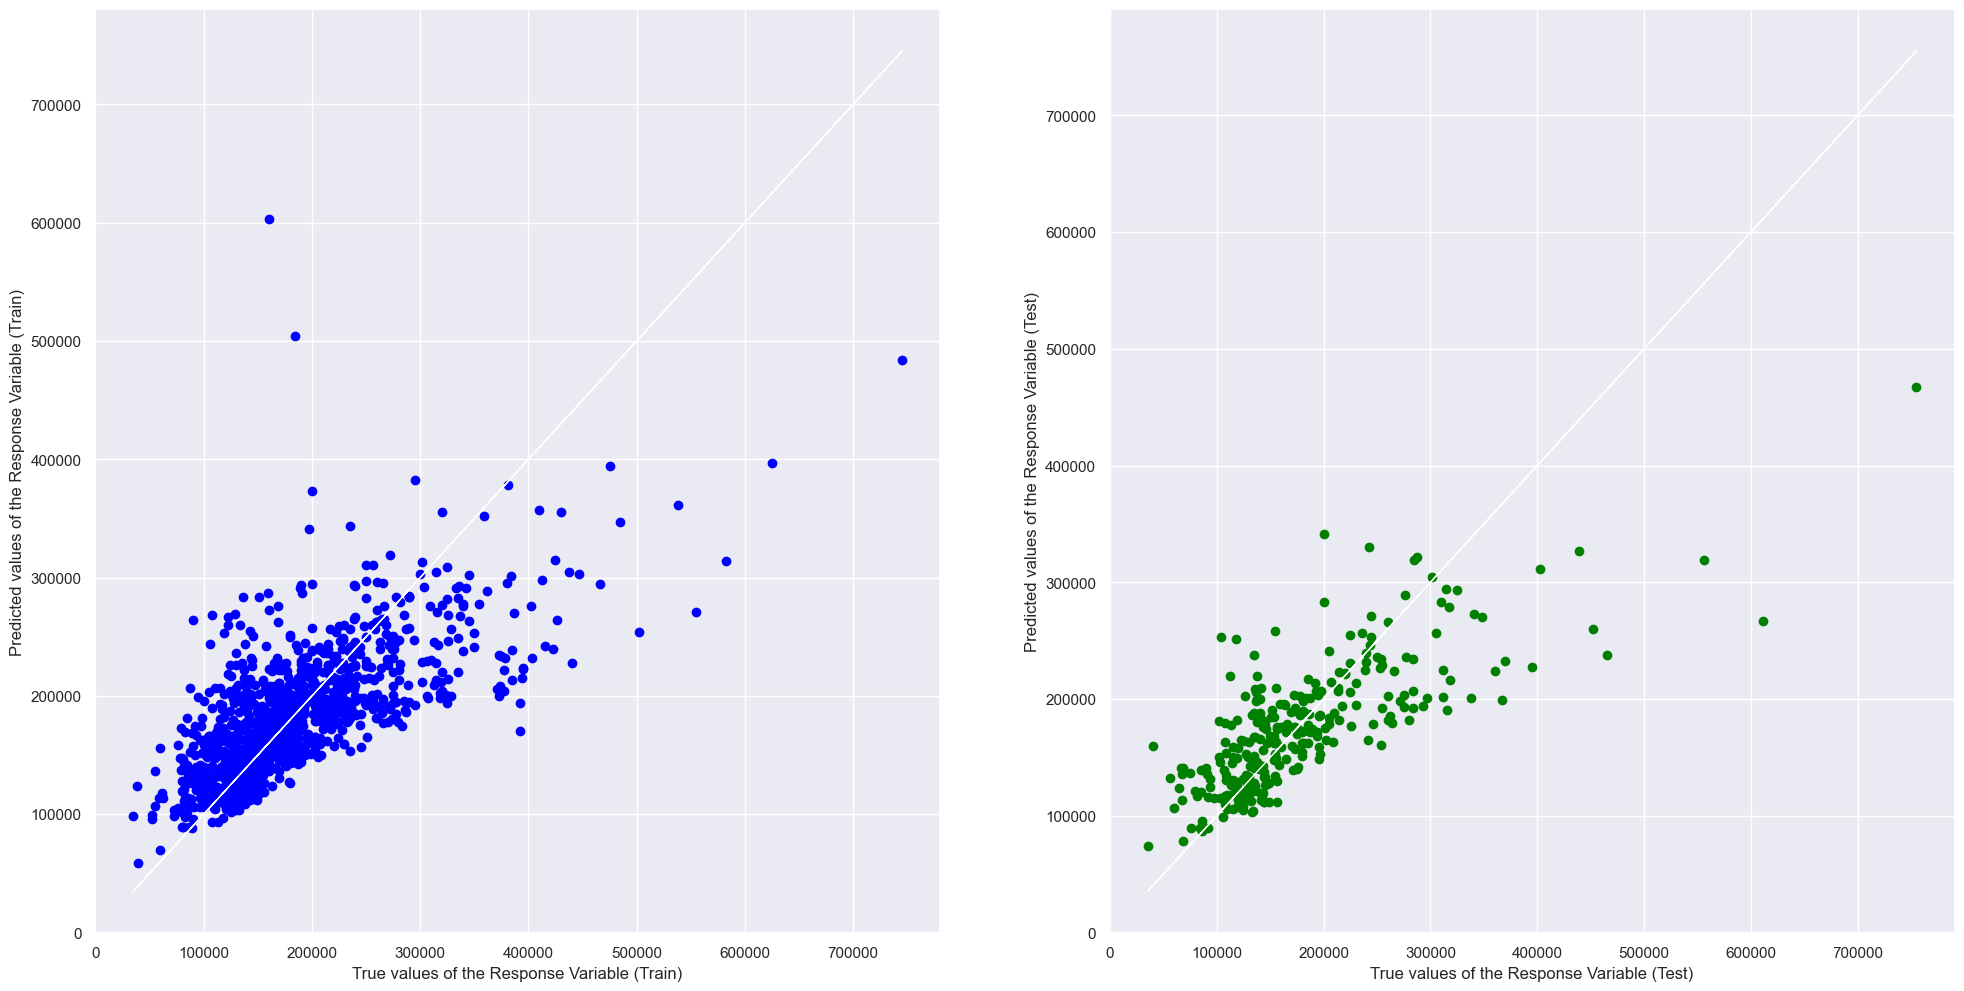

In [51]:
model = LinearRegression()
model.fit(X_train ,y_train)
print('Intercept \t: b = ', model.intercept_)
print('Coefficients \t: a = ', model.coef_)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Problem 2 : Predicting SalePrice using Other Variables
Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

Hints and Pointers

o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.

o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset.

In [54]:
totalbsmtsf = pd.DataFrame(dataset_house['TotalBsmtSF'])   
saleprice = pd.DataFrame(dataset_house['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(totalbsmtsf, saleprice, test_size=0.2, random_state=42)

Intercept 	: b =  [70161.50459652]
Coefficients 	: a =  [[104.8060222]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.35732403271537017
Mean Squared Error (MSE) 	: 3833273184.736912

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4306435638282802
Mean Squared Error (MSE) 	: 4367149593.598606



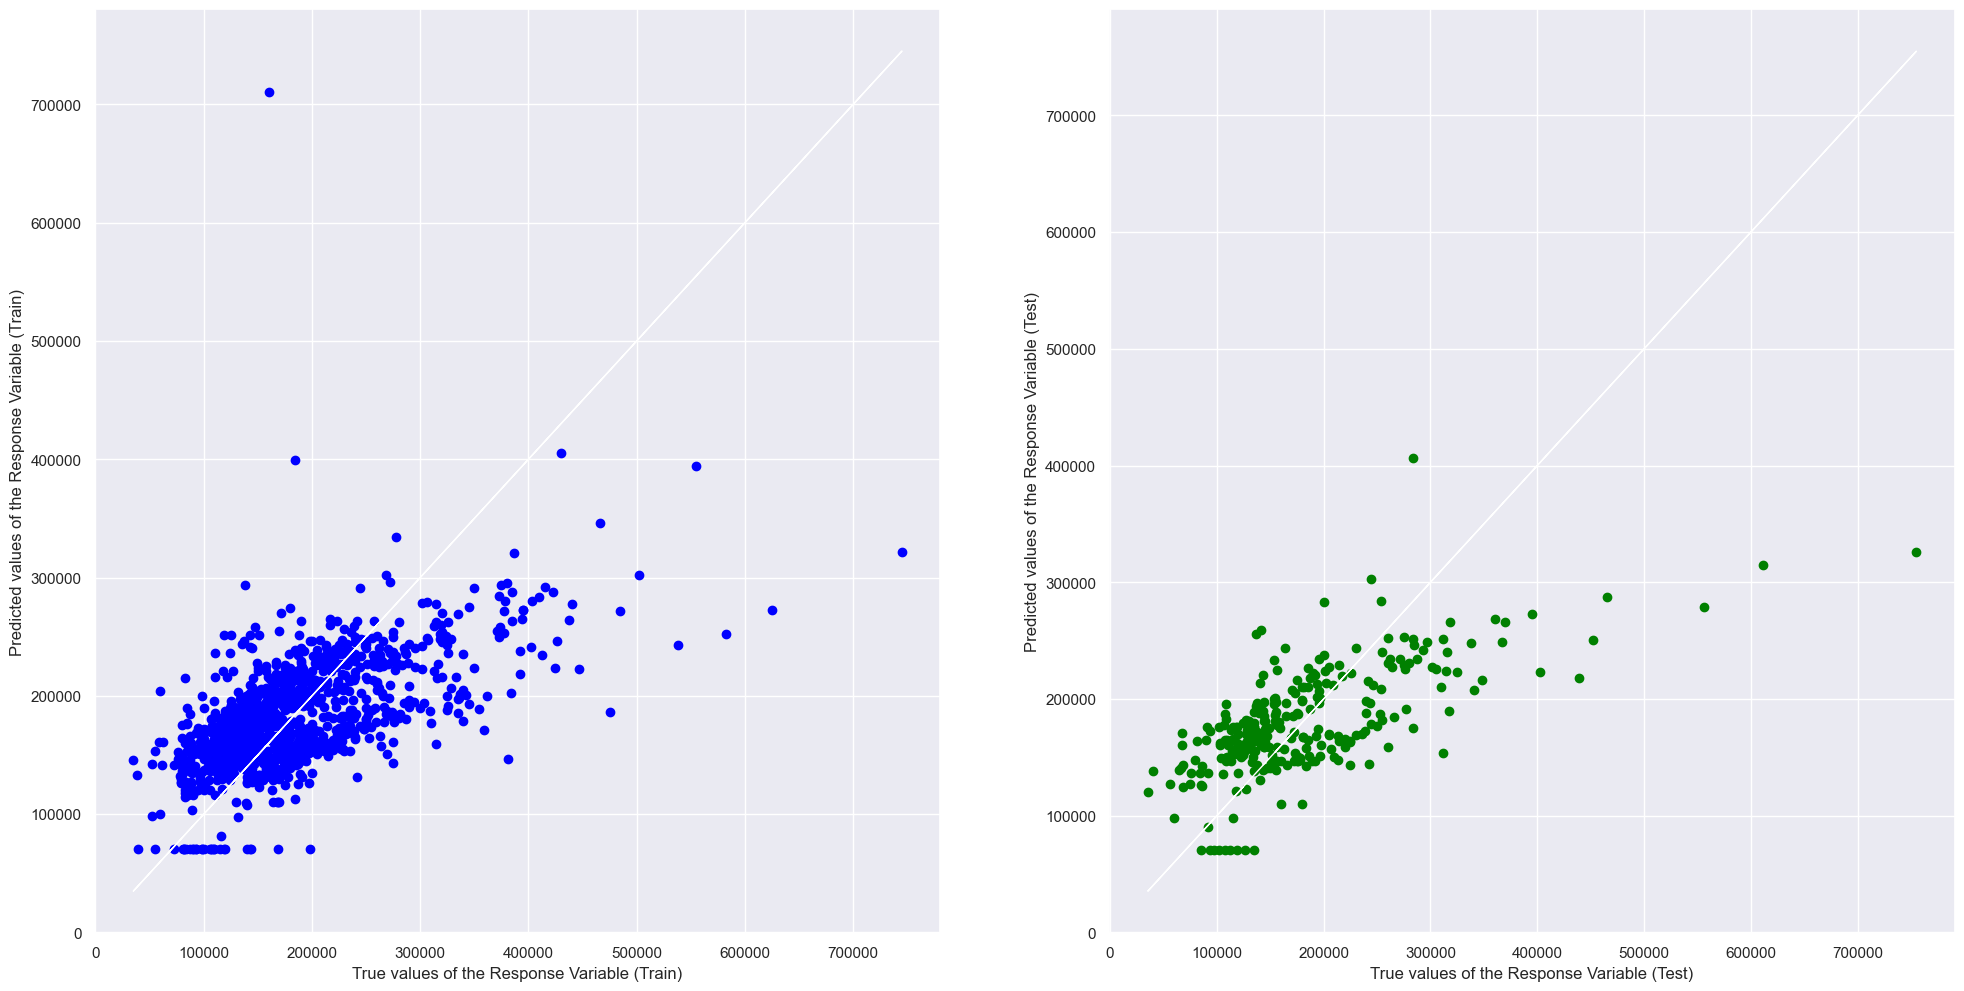

In [55]:
model_2 = LinearRegression()
model_2.fit(X_train ,y_train)
print('Intercept \t: b = ', model_2.intercept_)
print('Coefficients \t: a = ', model_2.coef_)

y_train_pred = model_2.predict(X_train)
y_test_pred = model_2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_2.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_2.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [58]:
garagearea = pd.DataFrame(dataset_house['GarageArea'])   
saleprice = pd.DataFrame(dataset_house['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(garagearea, saleprice, test_size=0.2, random_state=42)

Intercept 	: b =  [72640.20697413]
Coefficients 	: a =  [[228.44274774]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38954934705845656
Mean Squared Error (MSE) 	: 3641063673.8336325

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.385149321555714
Mean Squared Error (MSE) 	: 4716105272.377991



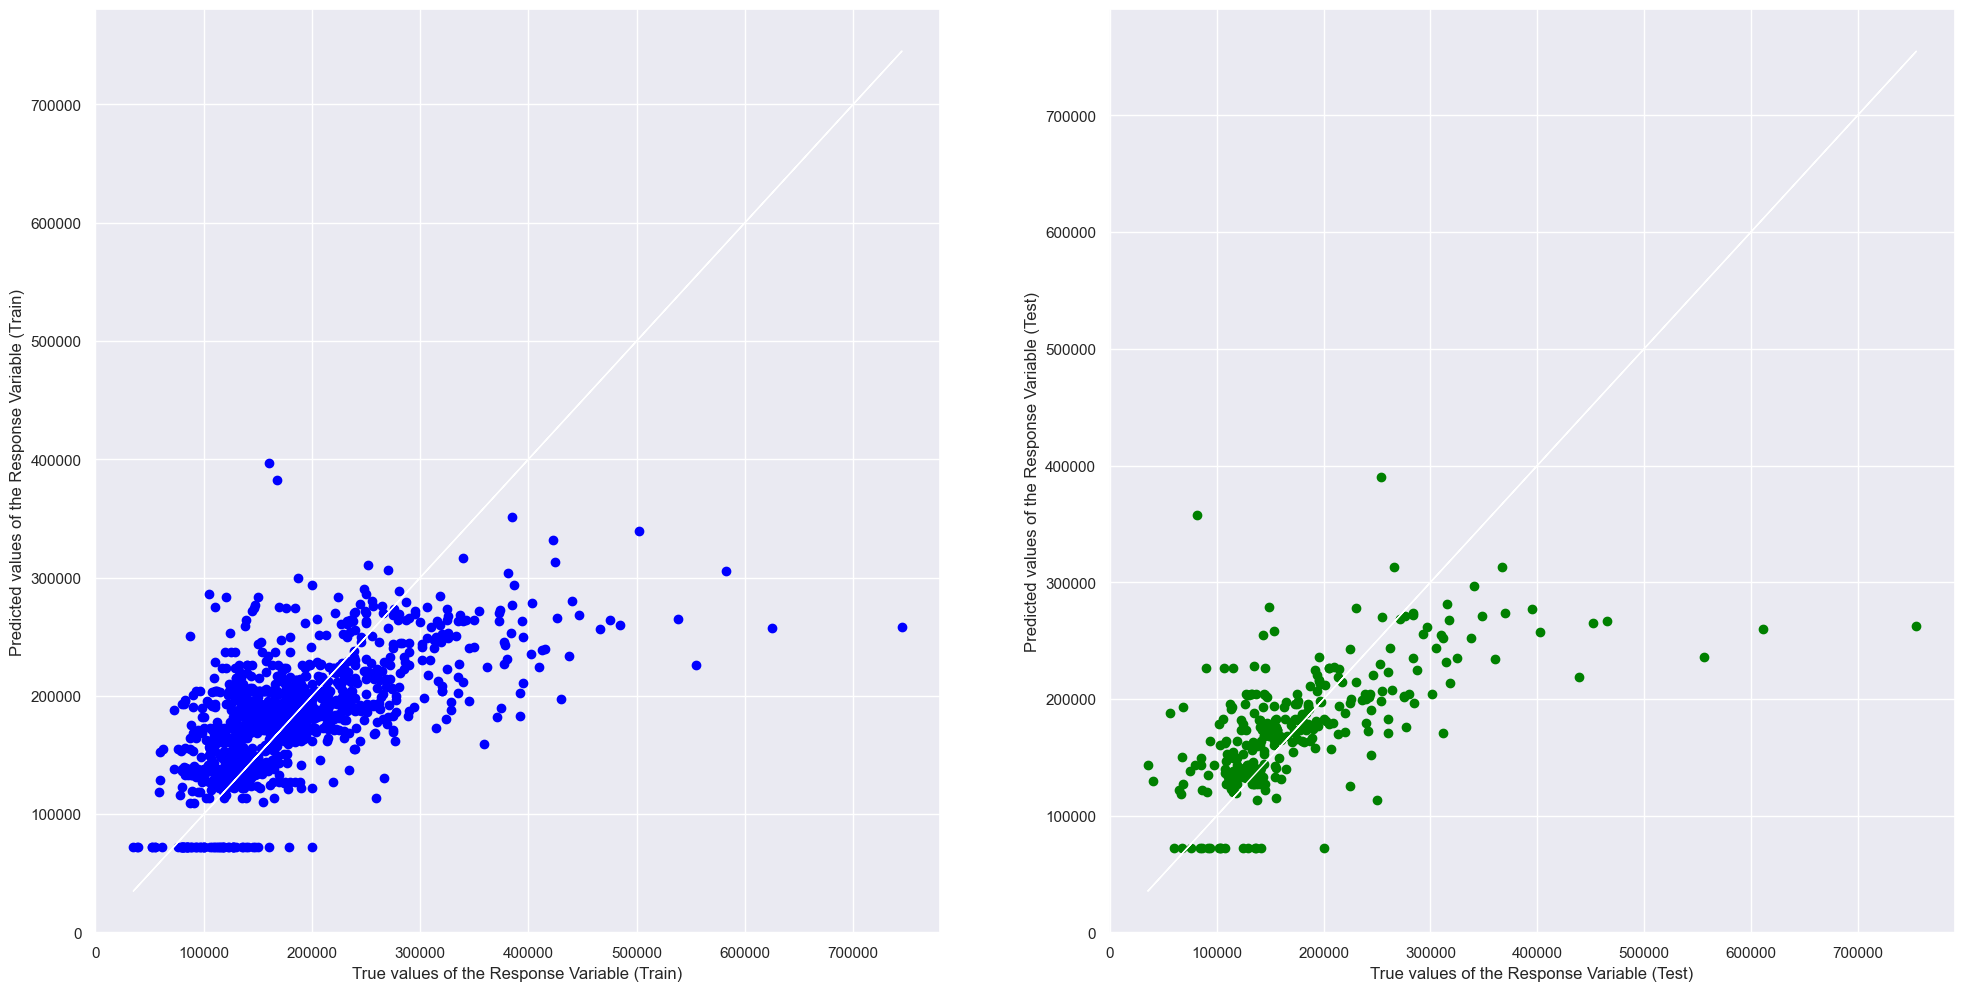

In [59]:
model_3 = LinearRegression()
model_3.fit(X_train ,y_train)
print('Intercept \t: b = ', model_3.intercept_)
print('Coefficients \t: a = ', model_3.coef_)

y_train_pred = model_3.predict(X_train)
y_test_pred = model_3.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_3.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_3.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept 	: b =  [72640.20697413]
Coefficients 	: a =  [[228.44274774]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38954934705845656
Mean Squared Error (MSE) 	: 3641063673.8336325

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.385149321555714
Mean Squared Error (MSE) 	: 4716105272.377991



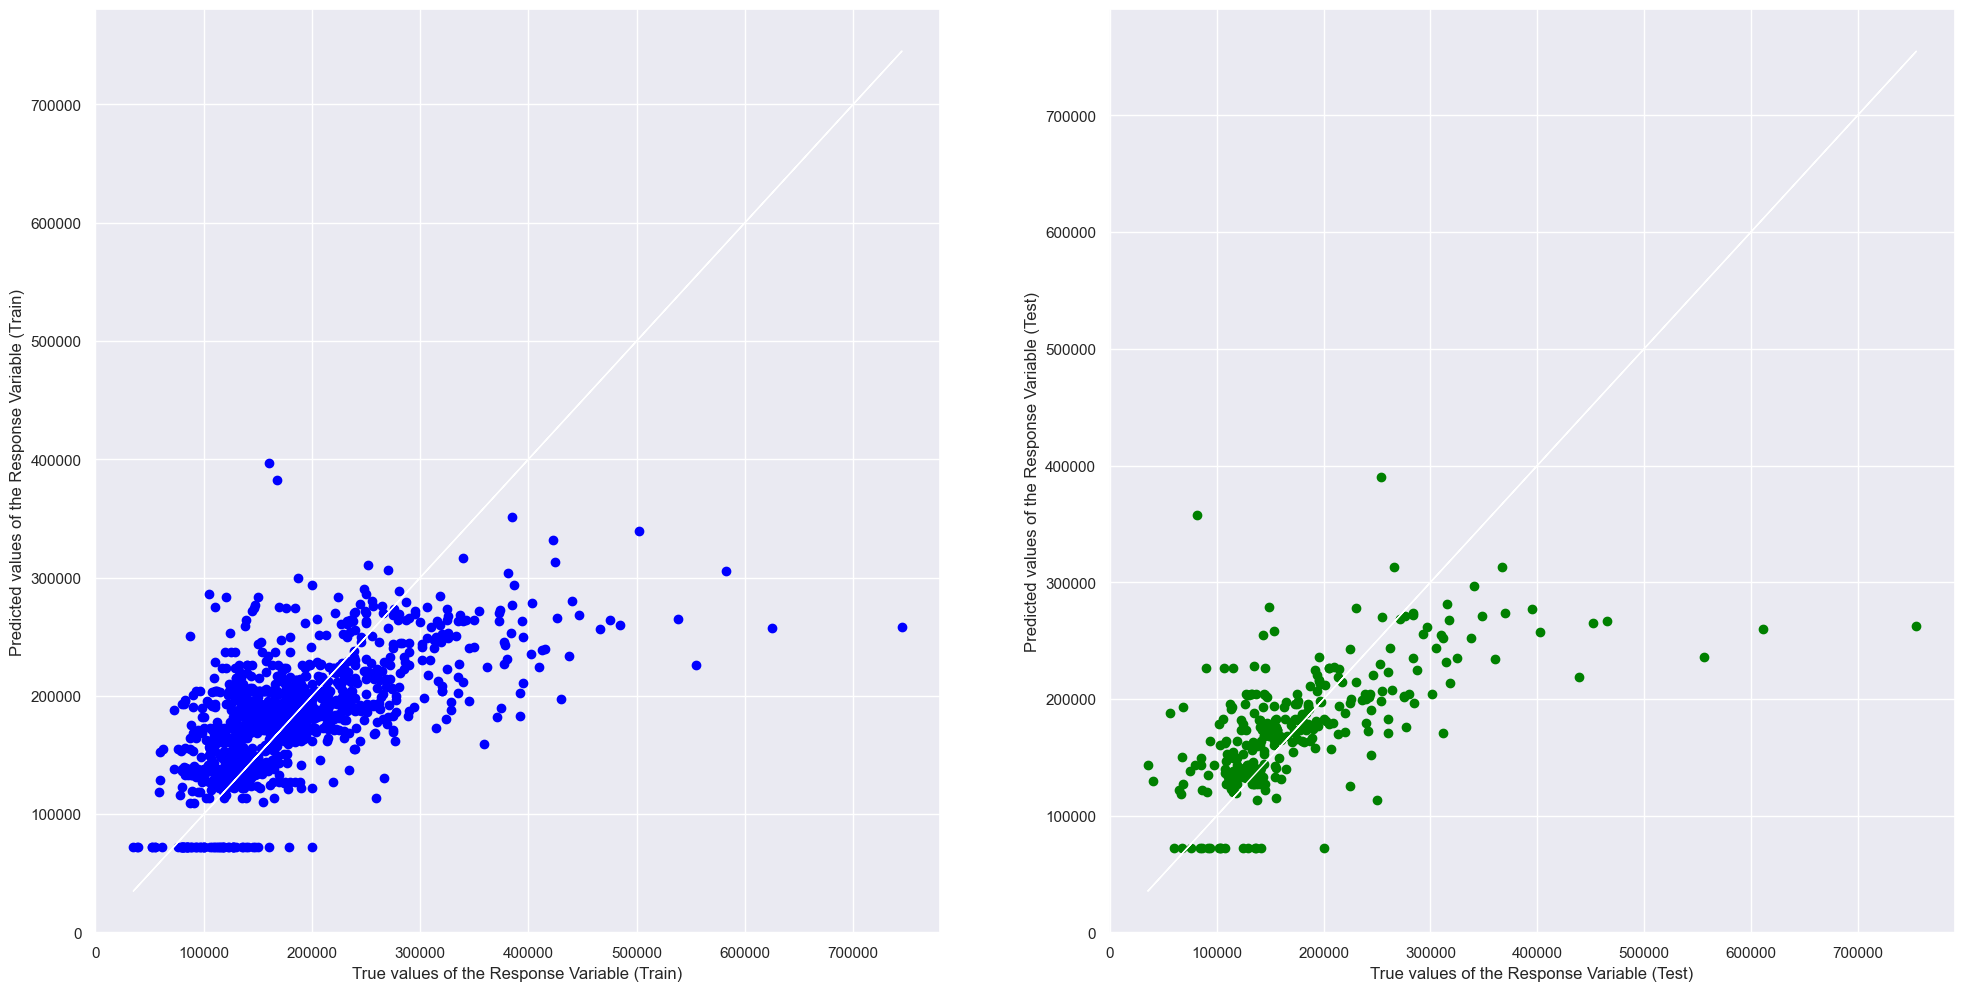

In [61]:
def lr(X_train, X_test, y_train, y_test):
    model_3 = LinearRegression()
    model_3.fit(X_train ,y_train)
    print('Intercept \t: b = ', model_3.intercept_)
    print('Coefficients \t: a = ', model_3.coef_)

    y_train_pred = model_3.predict(X_train)
    y_test_pred = model_3.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model_3.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", model_3.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()


    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()
lr(X_train, X_test, y_train, y_test)